In [1]:
from input import *

# Modellvorstellung

Dieses einleitende Kapitel beschreibt das Modell und beleuchtet dessen Grundgedanken. Es wird kurz auf die Implementierung in einer FEM-Software eingegangen. Ein Einführungsbeispiel zeigt die konzeptionelle Anwendung. Zudem werden erste Vor- und Nachteile der Modellvorstellung aufgezeigt.


## Modellbeschreibung{#sec-modellvorstellung}

In der Vertiefungsarbeit I @gitz_ansatze_2024 wurde das nichtlineare Biegeverhalten verschiedener Versuche mittels numerischer Integration der Krümmungen zufriedenstellend abgebildet. Um dieses Vorgehen auf statisch unbestimmte Systeme zu erweitern und die nötige Flexibilität in der Geometrie der Systeme zu erhalten, wird ein Stabstatikmodell basierend auf diesem Berechnungsansatz erstellt. Die @fig-modell_drehfeder zeigt die Modellierung eines einfachen Balkens, bei dem biege- und schubsteife Stäbe mit Federn gekoppelt sind. Diese Modellierung wird in den folgenden Kapiteln als Federmodell bezeichnet.


![Federmodell, biege- und schubsteife Stäbe gekoppelt mit Federn](../imgs/Modell_Drehfeder.svg){#fig-modell_drehfeder}

In dieser Modellierung resultieren sämtliche Verformungen des Systems aus den Federverbindungen, welche in FEM-Softwares als Stabendgelenke modelliert werden können. Mit der Wahl der entsprechenden Federcharakteristiken können passende Resultate erzielt werden. Dieser Ansatz ermöglicht es, der Anzahl an Freiheitsgraden in den Stabendgelenken entsprechend Steifigkeiten zuzuordnen. Den Rotationsfreiheitsgraden werden Momenten-Verdrehungs-Beziehungen und den Translationsfreiheitsgraden Kraft-Verformungs-Beziehungen zugeordnet. In den betrachteten 3D-Statiksoftwares können den Stabendgelenken Verläufe mittels eines Diagrammeditors eingegeben werden, die beliebige nichtlineare Beziehungen abbilden, sofern diese numerisch stabil, sowie stetig ansteigend sind. Grundsätzlich wird die Momenten-Verdrehungs-Beziehung (Drehfedercharakteristik) anhand der Momenten-Krümmungs-Beziehung des Querschnitts hergeleitet. Schubverformungen lassen sich beispielsweise durch die Bestimmung einer Kraft-Verformungs-Beziehung in Wirkungsrichtung der Querkraft ermitteln. Es lässt sich vorwegnehmen, dass die Wahl der Federcharakteristiken die Krux des Systems darstellt.

Alternativ zur Modellierung mittels Drehfedern lässt sich das Verhalten der Drehfeder mit einem Wegfederpaar abbilden. Dies erlaubt eine Modellierung mittels der nichtlinearen Fachwerksstäbe der Software Statik-9 der Cubus AG. Dieser Ansatz wird nur im Einführungsbeispiel berücksichtigt.

![Federmodell, biege- und schubsteife Stäbe gekoppelt mit einem Wegfederpaar](../imgs/Modell_Wegfeder.svg){#fig-modell_wegfeder}

Mit der Modellierung als Federmodell lassen sich beliebig komplexe Stoffgesetze in einer praxisüblichen Statiksoftware anwenden, sofern die Momenten-Krümmungs-Beziehung anhand dieser Beziehungen bestimmt werden kann. Zudem lässt sich eine Momenten-Krümmungs-Beziehung mit einer händischen Querschnittsanalyse leicht verifizieren. Dies ermöglicht die Überprüfung der Resultate und steigert so die Zuverlässigkeit der Berechnung. Ein weiterer Kernpunkt der Modellierung ist die Berücksichtigung der Momentenumlagerung. Durch die inkrementelle Steigerung der Last beim nichtlinearen Berechnungsalgorithmus können Momente entsprechend der beanspruchungsabhängigen Steifigkeit verteilt werden. Bei einem Zweifeldträger kann beispielsweise die Last nach dem Erreichen des Biegewiderstand beim Mittelauflager weiter gesteigert werden, sofern ausreichend Verformungsvermögen vorhanden ist. Ein konzeptioneller Nachteil der Modellbildung ist die Vielzahl an Diskretisierungen. Dies gilt allgemein für numerische Lösungen. In diesem Modell fliesst die Wahl der Elementlänge mit ein. Die Inkrementgrösse zur Bestimmung der Momenten-Krümmungs-Beziehung, sofern diese numerisch bestimmt wurde, hat einen Einfluss. Zudem gilt es bei einer nichtlinearen Berechnung, eine Inkrementgrösse zur Steigerung der Last im Lösungsalgorithmus zu wählen. Diese Parameter haben einen Einfluss auf die Resultate und sind sorgfältig zu wählen.

## Einführungsbeispiel

Das Einführungsbeispiel verfolgt das Ziel, das Modellverhalten nachvollziehbar darzustellen. Dazu werden die Verformungen des fiktiven Beispiels sowohl analytisch mittels der Arbeitsgleichung als auch numerisch mit der Statiksoftware AxisVM-X7 ermittelt.

Als Beispiel wurde ein Kragarm gewählt, der mit einer Drehfeder versehen ist, welche eine nichtlineare Drehfedercharakteristik aufweist. Es werden zwei Laststufen betrachtet, die so gewählt sind, dass das nichtlineare Verhalten der Drehfeder deutlich wird. Das statische System ist in @fig-kragarm-feder dargestellt.

![Statisches System des Kragarms, versehen mit einer Drehfeder in Trägermitte](../imgs/Kragarm_system_Feder.svg){#fig-kragarm-feder}

Durch den Vergleich der analytischen und numerischen Ergebnisse wird die Genauigkeit des Federmodells überprüft. Gleichzeitig bietet dieses Beispiel eine klare und anschauliche Demonstration der Modellierungsmethode, die im weiteren Verlauf der Arbeit auf komplexere statische Systeme angewendet wird.



Die folgenden Parameter fliessen in die Berechnungen ein. Beschrieben sind die Abmessungen und Materialeigenschaften, sowie die beiden Laststufen $F_1$ und $F_2$, wie auch die  Federsteifigkeiten $k_{\varphi1}$ und $k_{\varphi2}$.

In [2]:
%%render params

E = 10000*N/mm**2
F_1 = -10000*N
F_2 = -21500*N
h = 400*mm
k_phi_1 = 100000*(N*m)/rad
k_phi_2 = 10000*(N*m)/rad
L = 5*m
z = 400*mm
b = 200*mm


<IPython.core.display.Latex object>

Das Beispiel wird mit einem Querschnitt versehen, der lediglich zur Bestimmung der Biegesteifigkeit und folgend den Biegeverformungen dient. Alternativ könnte der Kragarm biegestarr modelliert werden, da lediglich die Verformungen aus der Drehfeder von Belang sind. Der Rechteckquerschnitt, der für den gesamten Kragarm gilt, ist in @fig-qs-kragarm dargestellt. Der Querschnitt ist mit einem durchwegs linear-elastischem Materialverhalten versehen.

![Rechteckquerschnitt des Kragarms mit lokalem Koordinatensystem und Abmessungen](../imgs/Kragarm_querschnitt.svg){#fig-qs-kragarm}

Die Drehfedercharakteristik in globaler $Y$-Richtung, bezogen auf das Koordinatensystem in @fig-kragarm-feder, ist in @fig-springcharacteristic zu sehen. Das bilineare Verhalten gilt für positive und negative Biegemomente und zeigt, wie die Steifigkeit der Drehfeder sich ändert, wenn das Moment einen bestimmten Schwellenwert überschreitet.

c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\matplotlib\cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


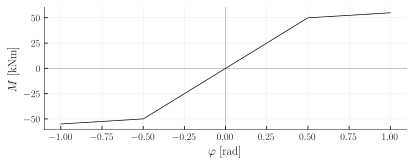

In [3]:
#| label: fig-springcharacteristic
#| fig-cap: "Charakteristik der Drehfeder des Kragarms"


def M_phi_spring(phi: np.array, k_phi_1, k_phi_2):
    phi_1, phi_2, phi_3, phi_4 = np.array_split(phi.magnitude, 4)*rad
    M_phi_1 = phi_3 * k_phi_1
    M_phi_2 = M_phi_1[-1] + phi_3 * k_phi_2
    M_phi_3 = np.flip(-M_phi_1)
    M_phi_4 = np.flip(-M_phi_2)

    M_phi = np.concatenate((M_phi_4, M_phi_3, M_phi_1, M_phi_2))
    return M_phi


# Arrays
Phi_spring_array = np.linspace(-1, 1, 1000)*rad
M_phi_array = M_phi_spring(Phi_spring_array, k_phi_1, k_phi_2)


plt.plot(Phi_spring_array, M_phi_array / 10**3, color="black")
#plt.fill_between(Phi_spring_array, M_phi_array / 10**3, color="black", alpha=0.1)
plt.axhline(0,color='black', linewidth=0.2)
plt.axvline(0,color='black', linewidth=0.2)

plt.xlabel("$\\varphi$ [rad]")
plt.ylabel("$M$ [kNm]")
plt.show()

### Biegeverformung

Zunächst werden die Biegeverformungen mittels der Differentialgleichung für reine Biegeträger ermittelt. Dabei wird die Drehfeder vernachlässigt. Das statische System ist in @fig-kragarm-sys dargestellt. Dieses Vorgehen führt zu den Zustandslinien der Schnittgrössen, die in @fig-skkragarmreal aufgezeigt sind.

![Statisches System des Kragarms ohne Drehfeder](../imgs/Kragarm_System.svg){#fig-kragarm-sys}

In [4]:
# GEOMETRY System
x_array = np.linspace(0, L, 500)
q_array = np.zeros(len(x_array))
I = h**3 * b / 12


def V_x(c, q_x, x):
    q_integrated = integrate.cumulative_trapezoid(q_x, x, initial=0)
    return -q_integrated + c[0]


def M_x(c, q_x, x):
    V_x_calc = V_x(c, q_x, x)
    V_integrated = integrate.cumulative_trapezoid(V_x_calc, x, initial=0)
    return V_integrated + c[1]


def Phi_x(c, q_x, x, E, I):
    M_x_calc = M_x(c, q_x, x)
    M_integrated = integrate.cumulative_trapezoid(M_x_calc, x, initial=0)
    return 1 / (E * I) * M_integrated + c[2]


def w_x(c, q_x, x, E, I):
    Phi_x_calc = Phi_x(c, q_x, x, E, I)
    Phi_integrated = -integrate.cumulative_trapezoid(Phi_x_calc, x, initial=0)
    return Phi_integrated + c[3]


# Define the equations to solve


def calc_internal_forces(F: float, E, I):
    def initial_conditions(c):
        return [
            V_x(c, q_array, x_array)[0] + F,  # Shear force at the start is F
            M_x(c, q_array, x_array)[-1],  # Bending moment at the end is 0
            Phi_x(c, q_array, x_array, E, I)[0],  # Angle or rotation at the start is 0
            w_x(c, q_array, x_array, E, I)[0],
        ]  # Displacement at the start is 0

    # Solve for the integration constants
    integration_constants = fsolve(initial_conditions, [1, 1, 1, 1])

    V_x_array = V_x(integration_constants, q_array, x_array)
    M_x_array = M_x(integration_constants, q_array, x_array)
    Phi_x_array = Phi_x(integration_constants, q_array, x_array, E, I)
    w_x_array = w_x(integration_constants, q_array, x_array, E, I)

    return V_x_array, M_x_array, Phi_x_array, w_x_array


internal_forces_F1 = calc_internal_forces(F_1.magnitude, E.to(N/m**2).magnitude, I.to(m**4).magnitude)
internal_forces_F2 = calc_internal_forces(F_2.magnitude, E.to(N/m**2).magnitude, I.to(m**4).magnitude)

c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\scipy\integrate\_quadrature.py:498: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.asarray(x)


In [5]:
plot_counter_inner_forces = 1


def plot_inner_forces(
    V: np.array,
    M: np.array,
    Phi: np.array,
    w: np.array,
    x: np.array,
    kinematic=True,
    colors: list = ["green", "orange", "red", "blue"],
):
    global plot_counter_inner_forces

    fig, axs = plt.subplots(2, 2, figsize=(6, 4))

    # Plot V_x_array
    axs[0, 0].plot(x, V / 1000, color=colors[0], alpha=0.5)
    axs[0, 0].fill_between(x, V / 1000, color=colors[0], alpha=0.1)
    axs[0, 0].plot(x, x * 0, color="black")
    axs[0, 0].set_xlabel("$x$ [m]")
    axs[0, 0].set_ylabel("$V$ [kN]")

    # Plot M_x_array
    axs[0, 1].plot(x, M / 10**3, color=colors[1], alpha=0.5)
    axs[0, 1].fill_between(x, M / 10**3, color=colors[1], alpha=0.1)
    axs[0, 1].plot(x, x * 0, color="black")
    axs[0, 1].invert_yaxis()  # Invert the y-axis

    axs[0, 1].set_xlabel("$x$ [m]")
    axs[0, 1].set_ylabel("$M$ [kNm]")

    # Plot Phi_x_array
    axs[1, 0].plot(x, Phi, color=colors[2], alpha=0.5)
    axs[1, 0].fill_between(x, Phi, color=colors[2], alpha=0.1)
    axs[1, 0].plot(x, x * 0, color="black")
    axs[1, 0].set_xlabel("$x$ [m]")
    # axs[1, 0].set_ylim(0,1)
    axs[1, 0].set_ylabel("$\\varphi$ [-]")

    # Plot w_x_array
    axs[1, 1].plot(x, w * 1000, color=colors[3], alpha=0.5)
    axs[1, 1].fill_between(x, w * 1000, color=colors[3], alpha=0.1)
    axs[1, 1].plot(x, x * 0, color="black")
    axs[1, 1].invert_yaxis()  # Invert the y-axis
    axs[1, 1].set_xlabel("$x$ [m]")
    axs[1, 1].set_ylabel("$w$ [mm]")

    if kinematic == False:
        fig.delaxes(axs[1, 1])
        fig.delaxes(axs[1, 0])
        axs[0, 0].set_ylabel("$\\bar{V}$ [-]")
        axs[0, 1].set_ylabel("$\\bar{M}$ [m]")


    plt.tight_layout()
    plt.savefig(f"imgs/inner_forces_{plot_counter_inner_forces}.svg")
    plt.show()
    plot_counter_inner_forces += 1

c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\numpy\ma\core.py:2359: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=False, subok=True)


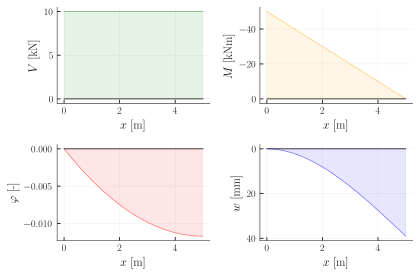

In [6]:
#| label: fig-skkragarmreal
#| fig-cap: "Schnittkräfte des Systems aus @fig-kragarm-sys für die Last $F_1$"

plot_inner_forces(*internal_forces_F1, x_array, kinematic=True)

Die maximale Verformung am Endpunkt des Kragarms ohne Drehfeder beträgt:

In [7]:
%%render params
# w_max_hand = (-F_1 * L**3 / (3 * E * I)).to(mm)
w_EI_F1 = (internal_forces_F1[-1][-1]*m).to(mm)

<IPython.core.display.Latex object>

Das analoge Vorgehen führt für die Laststufe $F_2$ zu den Zustandslinien der Schnittgrössen in der @fig-skkragarmreal_high.

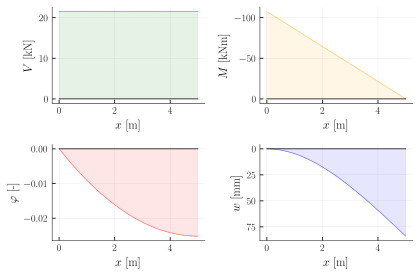

In [8]:
#| label: fig-skkragarmreal_high
#| fig-cap: "Schnittkräfte des Systems aus @fig-kragarm-sys für die Last $F2$"

plot_inner_forces(*internal_forces_F2, x_array)

Diese Darstellung zeigt, wie sich die Schnittgrössen des Kragarms unter einer erhöhten Last ändern, und bietet eine Vergleichsbasis zur ersten Laststufe $F_1$. Da ein durchwegs linear-elastisches Biegeverhalten vorausgesetzt wird, entspricht der Faktor der Erhöhung der Verformung dem Quotienten der beiden Laststufen.

$$
\frac{w_{EI_{F2}}}{w_{EI_{F1}}} = \frac{F_2}{F_1}
$$

Dabei beträgt die maximale Biegeverformung am Ende des Kragarms ohne Drehfeder für die Last $F_2$:

In [9]:
%%render params
# w_max_hand = (-F_1 * L**3 / (3 * E * I)).to(mm)
w_EI_F2 = (internal_forces_F2[-1][-1]*m).to(mm)

<IPython.core.display.Latex object>

### Verformung der Drehfeder

Zur Bestimmung der Verformung am Ende des Kragarms des Systems mit der Drehfeder wird die Arbeitsgleichung angewendet. Dazu wird an einem virtuellen System eine Einzellast eingeführt, an der Stelle an dem die Verformung bestimmt werden soll. Dargestellt ist dies in @fig-kragarm-sys-virtuell. 

![Statisches System des Kragarms im virtuellen Kräftezustand](../imgs/Kragarm_system_feder_virtuell.svg){#fig-kragarm-sys-virtuell}

Die entsprechenden Verläufe der Querkraft und des Biegemoments zeigt die @fig-sk-kragarm-virtuell für das virtuelle System.

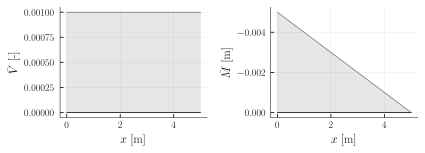

In [10]:
#| label: fig-sk-kragarm-virtuell
#| fig-cap: "Schnittkräfte des virtuellen Systems aus @fig-kragarm-sys-virtuell"

internal_forces_virtual = calc_internal_forces(-1.0, E.magnitude, I.magnitude)

plot_inner_forces(
    *internal_forces_virtual,
    x_array,
    kinematic=False,
    colors=["black", "black", "black", "black"]
)


Bei der Arbeitsgleichung werden lediglich Verdrehungsterme berücksichtigt. Die Verformung der Drehfeder kann somit mit der folgenden Gleichung bestimmt werden. 

$$
w_{\varphi} = \bar{M} \frac{M}{k_\varphi} = \bar{M} \varphi
$$

Die Verdrehung lässt sich aus der Federcharakteristik mit dem Biegemoment in Trägermitte bestimmen. Die @fig-feder-force zeigt die Position der Laststufen im Diagramm. 

In [11]:
# Takes the corresponding phi for the middle M
phi_spring_F1 = np.interp(
    np.median(internal_forces_F1[1])*N*m, M_phi_array, Phi_spring_array
)
phi_spring_F2 = np.interp(
    np.median(internal_forces_F2[1])*N*m, M_phi_array, Phi_spring_array
)

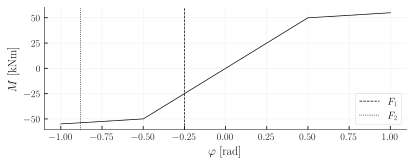

In [12]:
#| label: fig-feder-force
#| fig-cap: "Charakteristik der Drehfeder mit Bestimmung der Verdrehung anhand der Laststufen"


plt.plot(Phi_spring_array, M_phi_array / 10**3, color="black")
#plt.fill_between(Phi_spring_array, M_phi_array / 10**3, color="black", alpha=0.1)

plt.axvline(x=phi_spring_F1, color="black", linestyle="--", label="$F_1$")
plt.axvline(x=phi_spring_F2, color="black", linestyle="dotted", label="$F_2$")


plt.xlabel("$\\varphi$ [rad]")
plt.ylabel("$M$ [kNm]")
plt.legend()
plt.savefig("imgs/spring_charact.svg")
plt.show()


Angewendet auf das System der @fig-kragarm-feder folgen für die beiden Laststufen die Deformationen der Drehfeder zu:

In [13]:
%%render params

w_phi_F1 = (np.median(internal_forces_virtual[1]) * phi_spring_F1*m).to(mm)
w_phi_F2 = (np.median(internal_forces_virtual[1]) * phi_spring_F2*m).to(mm)



<IPython.core.display.Latex object>

Dazu gilt es den Anteil aus der Biegeverformung zu addieren. Die totale Verformung beträgt:

In [14]:
%%render 

w_F1 = w_phi_F1 + w_EI_F1
w_F2 = w_phi_F2 + w_EI_F2


<IPython.core.display.Latex object>

### Stabstatikmodell

Die analytisch ermittelten Verformungen werden nun mit der Lösung der Stabstatiksoftware verglichen. Das statische System, gemäss @fig-kragarm-feder, wird in der Statiksoftware AxisVM X7 modelliert. Dazu wird die Drehfeder als Federelement modelliert und in der $YY$-Dimension mit der Federcharakteristik versehen. Die angeschlossenen Stäbe sind mit entsprechendem Querschnitt und der entsprechenden Biegesteifigkeit modelliert. Die Verformungen in $Z$-Richtung sind in @fig-kragarm-drehfeder-10 und @fig-kragarm-drehfeder-215 gezeigt.

![Verformungen in $Z$-Richtung für $F_1$ aus AxisVM-X7 mit dem Federmodell](../imgs/Kragarm_drehfeder_10.svg){#fig-kragarm-drehfeder-10}

Das Modell liefert für die Last $F_1$ die maximale Verformung aus der Drehfeder und dem Biegestab von:

$$
w_{1,tot,F1} = 663.5 \text{mm}
$$

![Verformungen in $Z$-Richtung für $F_2$ aus AxisVM-X7 mit dem Federmodell](../imgs/Kragarm_drehfeder_215.svg){#fig-kragarm-drehfeder-215}

Für die Last $F_2$ beträgt die maximale Gesamtverformung:


$$
w_{1,tot,F2} = 2265.1 \text{mm}
$$


Das Modell liefert die annähernd gleichen Resultate wie die Handrechnung. Die Genauigkeit ist zufriedenstellend.

#### Modellierungsalternative Wegfeder

Wie bereits in @sec-modellvorstellung erläutert, lässt sich das Verhalten der Drehfeder mit einem Wegfederpaar abbilden. Dazu wird in einem ersten Schritt die Drehfedercharakteristik in eine Wegfedercharakteristik umgerechnet. Als Grundlage dient die Modellierung gemäss @fig-verdrehung_verformung. Die Abbildung zeigt die kinematische Relation eines reinen Biegeelements.

![Kinematische Relation eines reinen Biegeelements](../imgs/Skizze_Verdrehung_Verformung.svg){#fig-verdrehung_verformung}

Mittels den folgenden Gleichungen lässt sich so die Wegfedercharakteristik bestimmen. Der Abstand zwischen dem Wegfederpaar wird mit $z$ beschrieben.

$$
F = \frac{M}{z}
$$

$$
u = \frac{\tan(\varphi) \cdot z}{2} \simeq \frac{\varphi \cdot z}{2}
$$

Durch die Berücksichtigung der trigonometrischen Funktion ist der Verlauf nicht exakt bilinear. Die umgerechnete Wegfedercharakteristik ist in @fig-wegfeder-force aufgezeigt. Der Verlauf kann lediglich mit einer begrenzten Anzahl an Punkten im Diagrammeditor von AxisVM-X7 hinterlegt werden. Dies ist gleichbedeutend mit einer Diskretisierung des Verlaufs.

In [15]:
def F_u_spring(M: np.array, Phi: np.array, z: float):
    F = M / z
    u = np.tan(Phi) * z / 2

    return F, u


F_array, u_array = F_u_spring(M_phi_array, Phi_spring_array, z)

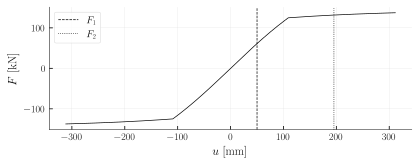

In [16]:
#| label: fig-wegfeder-force
#| fig-cap: "Charakteristik der Wegfeder, umgerechnet aus der Drehfedercharakteristik"


# The deformations for the corresponding F
index_F1 = np.argmin(np.abs(F_array - 61.25*kN))
u_F1 = u_array[index_F1]

index_F2 = np.argmin(np.abs(F_array - 131.69 *kN))
u_F2 = u_array[index_F2]

plt.axvline(x=u_F1.magnitude, color="black", linestyle="--", label="$F_1$")
plt.axvline(x=u_F2.magnitude, color="black", linestyle="dotted", label="$F_2$")


plt.plot(u_array, F_array , color="black")
#plt.fill_between(u_array, F_array, color="black", alpha=0.1)
plt.xlabel("$u$ [mm]")
plt.ylabel("$F$ [kN]")
plt.legend()
plt.savefig("imgs/F_u.svg")
plt.show()

In [17]:
# Federgesetz wird zu einer Textdatei gespeichert um diese ins AxisVM zu implementieren

array_reduced = np.linspace(min(u_array),max(u_array),100)
F_array_reduce = np.interp(array_reduced, u_array, F_array)
u_array_reduce = np.interp(F_array_reduce, F_array, u_array)

# Save the array to a text file
np.savetxt('u_array.txt', u_array_reduce.magnitude)
np.savetxt('F_array.txt', F_array_reduce.magnitude)

Die Resultate mit dem Wegfedermodell sind in der @fig-f1-wegfeder und @fig-f2-wegfeder gezeigt.

![Verformungen in $Z$-Richtung für $F_1$ aus AxisVM-X7 mit Wegfedermodell](../imgs/Kragarm_wegfeder_10.svg){#fig-f1-wegfeder}

Die maximale Verformung in $Z$-Richtung für die Last $F_1$ entspricht:

$$
w_{1,tot,F1} = 659 \text{mm}
$$

Und für die Last $F_2$:

$$
w_{1,tot,F2} = 2137.8 \text{mm}
$$

![Verformungen in $Z$-Richtung für $F_2$ aus AxisVM-X7 mit Wegfedermodell](../imgs/Kragarm_wegfeder_215.svg){#fig-f2-wegfeder}

Die Resultate der Modellierung mittels Wegfedern zeigen Differenzen zu denen mit der Drehfeder. Dies lässt sich auf die Diskretisierung des nichtlinearen Verlaufs der Wegfedercharakteristik zurückführen. Eine Approximation des Verlaufs führt zu beträchtlichen Abweichungen im Bereich der zweiten Laststufe. Dies ist auf die geringe Neigung, bzw. auf die Grösse von $k_{\varphi_2}$ der Drehfedercharakteristik zurückzuführen. 

Das Beispiel zeigt die Anwendung eines nicht-linearen Momenten-Verdrehungs-Verlaufs anschaulich auf. Die Verformungsgrössen sind direkt von der Federcharakteristik abhängig. Dies ermöglicht eine gezielte Steuerung der Verformungen. Zudem ist die Nachvollziehbarkeit durch die direkte abhängigkeit gegeben. Ebenfalls veranschaulicht das Beispiel die Problematik der Diskterisierung, angesprochen in @sec-modellvorstellung.